### Dimension Reduction  
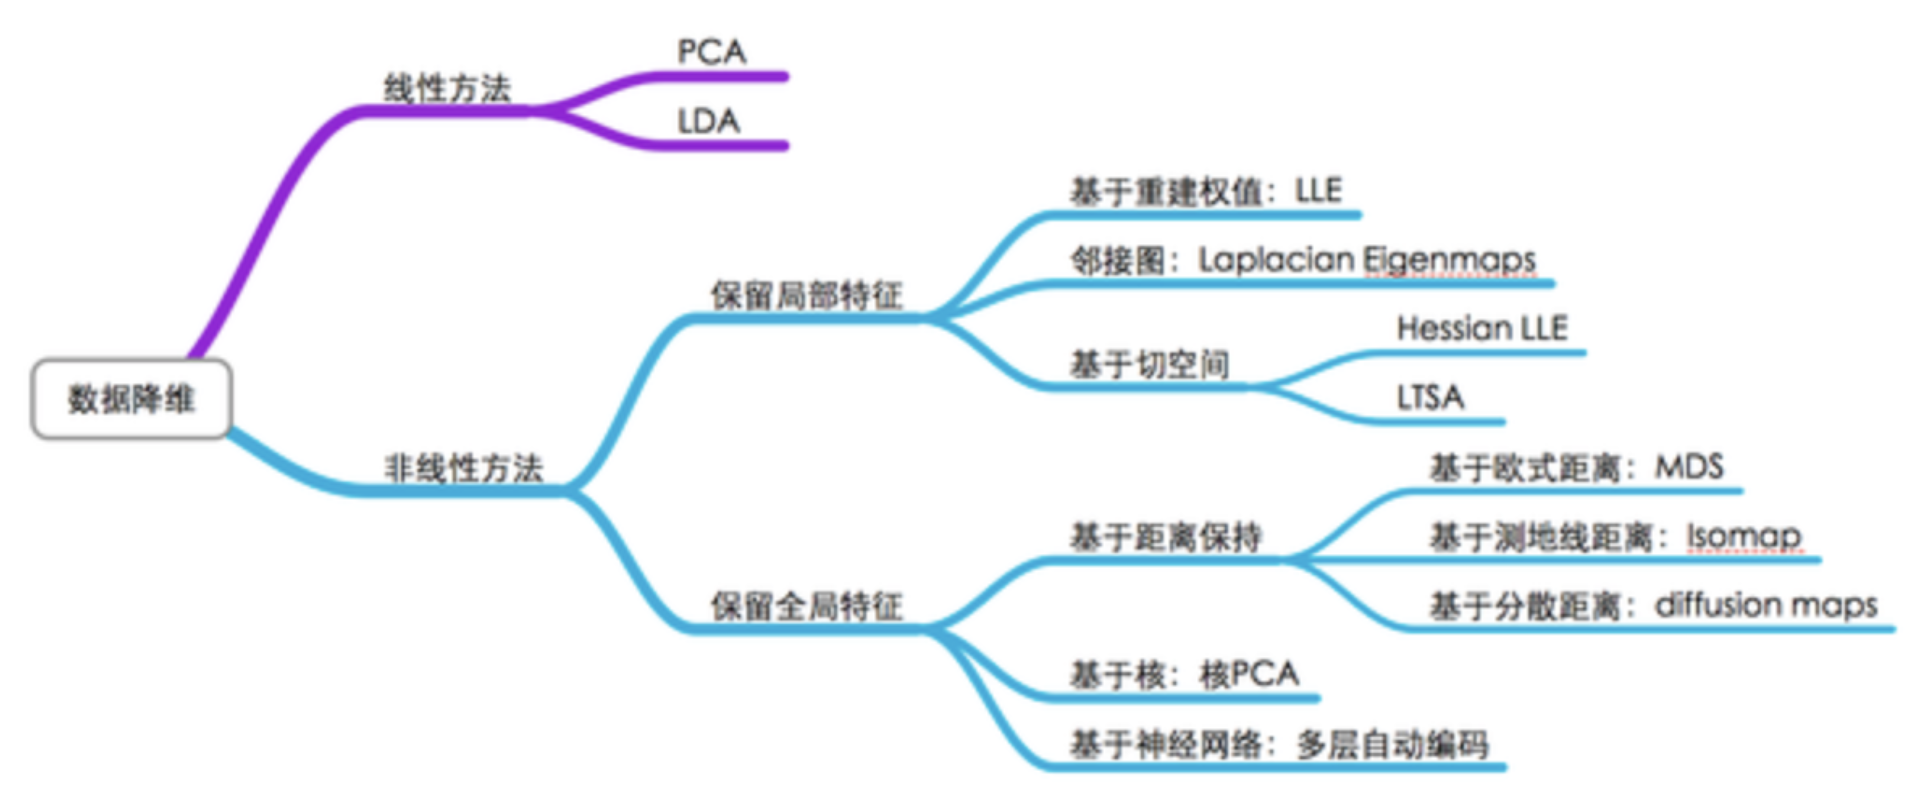
1）Reduce time and space complexity  
3）Denoise  
4）More robust  
5）Explanatory  
6）Visualization  

### Two New DataSets   
#### Nestorowa 1644 cells 3991 genes  
#### Paul 2730 cells 3451 genes

mat format

In [10]:
userpath('/Users/wangxin')
filename = './data/Nestorowa2016_scRNAseqData.mat'; 
data = load( filename ); 
ntest = 0; 
data  = data.scdata;

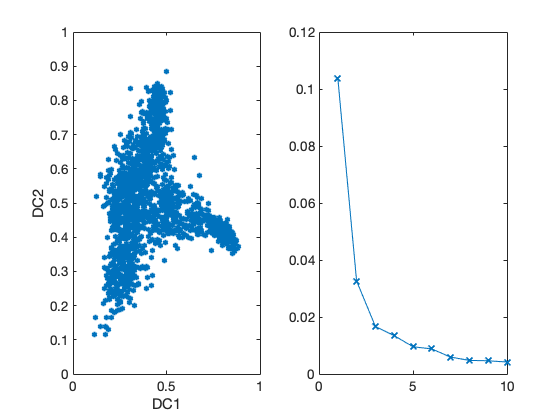

In [12]:
[dc, dcSig] = DiffusionMap_wNewData( data', [], 10, 0.5, Inf );
dc = dc_normalize(dc, 10);    
% save to mat file: dc，dcSig
save( filename, 'dc', 'dcSig' ,'-append' ) 
figure;
subplot( 1, 2, 1 ); 
f1=plot( dc(:,1), dc(:,2), 'o', 'markersize', 3); 
set(f1, 'markerfacecolor', get(f1, 'color'));
xlim( [0 1] ); ylim( [0 1]); 
xlabel('DC1'); ylabel('DC2')
subplot( 1, 2, 2 ); 
plot( dcSig, '-x' )

                     diffusion map               and               significant of component

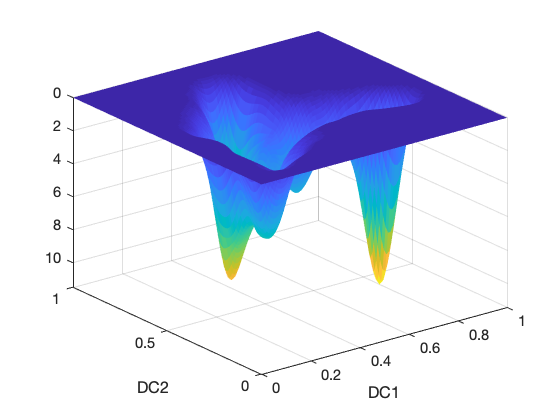

In [15]:
# matlab kdensity
# Kernel smoothing function estimate for univariate and bivariate data 
# unparam base clustering
N = [100 125]; 
Compute_systemMatrix( N ); 
global N1 dx xx yy 
[YY,XX] = meshgrid(yy,xx); 
[uHS,~,~] = ksdensity( [dc(:,1:2)], [XX(:),YY(:)], 'bandwidth', [0.03 0.03] );
uHS = reshape( uHS, N1(1), N1(2) ); 
figure; surf( XX, YY, uHS, 'linestyle','none' ); set(gca, 'Zdir', 'reverse'); xlabel('DC1'); ylabel('DC2'); 